# Image Data Collection and Processing
## Formative 2 - Data Preprocessing

This notebook processes facial images with multiple augmentations and extracts features for each team member.

Team Members:
1. Erneste
2. Thierry
3. Rodas
4. Idara

Required expressions: Neutral, Smile, Surprised

What This Notebook Does:
1. Loads images from existing Images folder at project root
2. Creates Augmented_Images and Visualizations folders inside Image_Processing_Notebook
3. Loads and displays your facial images
4. Applies 5 augmentations per image (rotation, flip, grayscale, brightness, zoom)
5. Creates comprehensive visualizations for all images and members
6. Saves everything to image_features.csv inside Image_Processing_Notebook

Simply run all cells and the notebook will handle everything!

## 1. Import Required Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

print(" Libraries imported successfully!")

 Libraries imported successfully!


## 2. Configuration & Directory Setup

In [2]:
# Get the current directory (Image_Processing_Notebook)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent  # Project root directory

print(f" Project Root Directory: {ROOT_DIR}")
print(f" Notebook Directory: {NOTEBOOK_DIR}\n")

# Configuration - Images from project root, outputs in notebook directory
IMAGES_DIR = ROOT_DIR / "Images"
OUTPUT_CSV = NOTEBOOK_DIR / "image_features.csv"
AUGMENTED_DIR = NOTEBOOK_DIR / "Augmented_Images"
VISUALIZATIONS_DIR = NOTEBOOK_DIR / "Visualizations"

# Team members and expressions
TEAM_MEMBERS = ["Erneste", "Thierry", "Rodas", "Idara"]
EXPRESSIONS = ["Neutral", "Smile", "Suprised"]

print("   Configuration:")
print(f"  • Images Directory: {IMAGES_DIR}")
print(f"  • Output CSV: {OUTPUT_CSV}")
print(f"  • Augmented Directory: {AUGMENTED_DIR}")
print(f"  • Visualizations Directory: {VISUALIZATIONS_DIR}")
print(f"  • Team Members: {', '.join(TEAM_MEMBERS)}")
print(f"  • Expressions: {', '.join(EXPRESSIONS)}")

 Project Root Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing
 Notebook Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Image_Processing_Notebook

   Configuration:
  • Images Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Images
  • Output CSV: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Image_Processing_Notebook\image_features.csv
  • Augmented Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Image_Processing_Notebook\Augmented_Images
  • Visualizations Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Image_Processing_Notebook\Visualizations
  • Team Members: Erneste, Thierry, Rodas, Idara
  • Expressions: Neutral, Smile, Suprised


## 3. Create Output Directories in Notebook Folder

In [3]:
# Create output directories inside notebook folder
AUGMENTED_DIR.mkdir(parents=True, exist_ok=True)
VISUALIZATIONS_DIR.mkdir(parents=True, exist_ok=True)

print("Directories created/verified:")
print(f"  • Images source: {IMAGES_DIR}")
print(f"  • Augmented output: {AUGMENTED_DIR}")
print(f"  • Visualizations: {VISUALIZATIONS_DIR}")

# Check if Images directory exists
if not IMAGES_DIR.exists():
    print(f"\nERROR: Images directory not found at {IMAGES_DIR}")
    print(f"   Please ensure the 'Images' folder exists at the project root with your images.")
else:
    print(f"\nImages directory found at project root!")
    print(f"\n   Image files should be in format: MemberName_Expression.jpg")
    print(f"   Example: Erneste_Neutral.jpg")

Directories created/verified:
  • Images source: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Images
  • Augmented output: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Image_Processing_Notebook\Augmented_Images
  • Visualizations: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Image_Processing_Notebook\Visualizations

Images directory found at project root!

   Image files should be in format: MemberName_Expression.jpg
   Example: Erneste_Neutral.jpg


## 4. Check for Images

In [4]:
# Check which images exist
missing_images = []
existing_images = []

if IMAGES_DIR.exists():
    for member in TEAM_MEMBERS:
        for expression in EXPRESSIONS:
            filename = f"{member}_{expression}.jpg"
            filepath = IMAGES_DIR / filename
            
            if filepath.exists():
                existing_images.append((member, expression, filename))
            else:
                missing_images.append((member, expression, filename))
else:
    print(f"Images directory not found: {IMAGES_DIR}")

print(f"\n{'='*60}")
print("IMAGE INVENTORY")
print(f"{'='*60}")
print(f"Found: {len(existing_images)} images")
print(f"Missing: {len(missing_images)} images")

if existing_images:
    print(f"\nAvailable Images:")
    for member, expression, filename in existing_images:
        print(f"  • {filename}")

if missing_images:
    print(f"\nMissing Images:")
    for member, expression, filename in missing_images:
        print(f"  • {filename} ({member} - {expression})")

print(f"{'='*60}\n")

if not existing_images:
    print("No images found! Please add images to the Images folder at project root.")
else:
    print(f"Ready to process {len(existing_images)} images!")


IMAGE INVENTORY
Found: 6 images
Missing: 6 images

Available Images:
  • Erneste_Neutral.jpg
  • Erneste_Smile.jpg
  • Erneste_Suprised.jpg
  • Thierry_Neutral.jpg
  • Thierry_Smile.jpg
  • Thierry_Suprised.jpg

Missing Images:
  • Rodas_Neutral.jpg (Rodas - Neutral)
  • Rodas_Smile.jpg (Rodas - Smile)
  • Rodas_Suprised.jpg (Rodas - Suprised)
  • Idara_Neutral.jpg (Idara - Neutral)
  • Idara_Smile.jpg (Idara - Smile)
  • Idara_Suprised.jpg (Idara - Suprised)

Ready to process 6 images!


## 5. Load and Display Original Images

Loading and displaying images...

  Loaded: Erneste_Neutral.jpg - Shape: (3392, 2544, 3)
  Loaded: Erneste_Smile.jpg - Shape: (3392, 2544, 3)
  Loaded: Erneste_Suprised.jpg - Shape: (3392, 2544, 3)


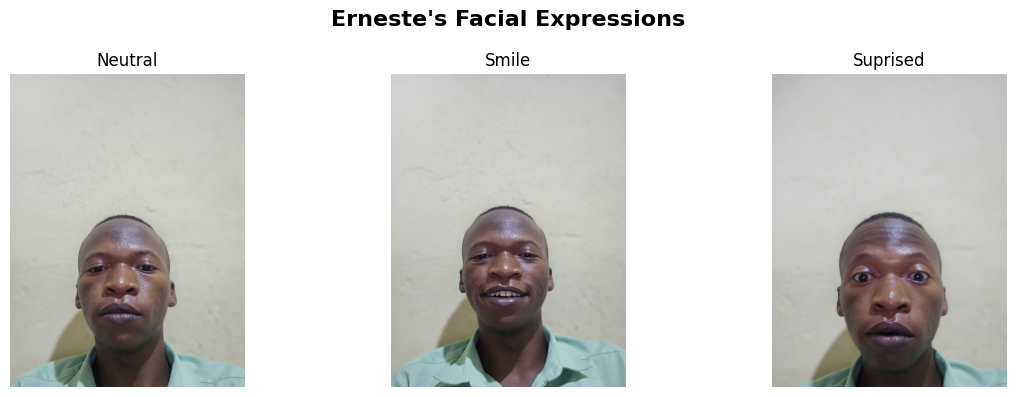

  Saved: Erneste_original_images.png

  Loaded: Thierry_Neutral.jpg - Shape: (1080, 810, 3)
  Loaded: Thierry_Smile.jpg - Shape: (1280, 720, 3)
  Loaded: Thierry_Suprised.jpg - Shape: (1280, 720, 3)


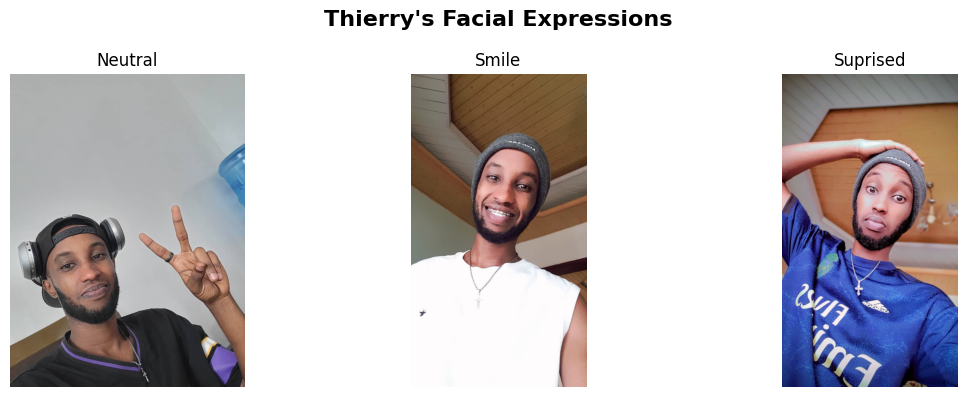

  Saved: Thierry_original_images.png



In [5]:
if existing_images:
    print("Loading and displaying images...\n")
    
    # Group by member
    member_images = {}
    for member, expression, filename in existing_images:
        if member not in member_images:
            member_images[member] = []
        member_images[member].append((expression, filename))
    
    # Display images for each member
    for member, images in member_images.items():
        num_images = len(images)
        if num_images == 0:
            continue
            
        fig, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
        if num_images == 1:
            axes = [axes]
        
        fig.suptitle(f"{member}'s Facial Expressions", fontsize=16, fontweight='bold')
        
        for idx, (expression, filename) in enumerate(images):
            filepath = IMAGES_DIR / filename
            img = cv2.imread(str(filepath))
            
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[idx].imshow(img_rgb)
                axes[idx].set_title(expression, fontsize=12)
                axes[idx].axis('off')
                print(f"  Loaded: {filename} - Shape: {img.shape}")
            else:
                print(f"  Failed to load: {filename}")
        
        plt.tight_layout()
        # Save in Visualizations folder
        save_path = VISUALIZATIONS_DIR / f"{member}_original_images.png"
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"  Saved: {save_path.name}\n")
else:
    print("No images to display!")

## 6. Define Augmentation Functions

In [6]:
def apply_augmentations(image, base_filename):
    """
    Apply 5 different augmentations to an image
    Returns: list of (augmented_image, augmentation_name, filename) tuples
    """
    augmented = []
    height, width = image.shape[:2]
    
    # 1. Rotation (15 degrees clockwise)
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 15, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (width, height))
    augmented.append((rotated, "Rotation_15deg", f"{base_filename}_rotated.jpg"))
    
    # 2. Horizontal Flip
    flipped = cv2.flip(image, 1)
    augmented.append((flipped, "Horizontal_Flip", f"{base_filename}_flipped.jpg"))
    
    # 3. Grayscale
    if len(image.shape) == 3:
        grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grayscale_3ch = cv2.cvtColor(grayscale, cv2.COLOR_GRAY2BGR)
    else:
        grayscale_3ch = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    augmented.append((grayscale_3ch, "Grayscale", f"{base_filename}_grayscale.jpg"))
    
    # 4. Brightness Adjustment (increase by 30)
    bright = cv2.convertScaleAbs(image, alpha=1.0, beta=30)
    augmented.append((bright, "Brightness_+30", f"{base_filename}_bright.jpg"))
    
    # 5. Zoom (1.2x crop from center)
    crop_size = int(min(height, width) * 0.8)
    start_y = (height - crop_size) // 2
    start_x = (width - crop_size) // 2
    cropped = image[start_y:start_y+crop_size, start_x:start_x+crop_size]
    zoomed = cv2.resize(cropped, (width, height))
    augmented.append((zoomed, "Zoom_1.2x", f"{base_filename}_zoomed.jpg"))
    
    return augmented

print("Augmentation functions defined")
print("  Augmentations: Rotation (15°), Flip, Grayscale, Brightness (+30), Zoom (1.2x)")

Augmentation functions defined
  Augmentations: Rotation (15°), Flip, Grayscale, Brightness (+30), Zoom (1.2x)


## 7. Define Feature Extraction Function

In [7]:
def extract_features(image, member, expression, augmentation):
    """
    Extract multiple features from an image:
    - Color histogram features (RGB channels - 24 features)
    - Grayscale histogram features (8 features)
    - Statistical features (mean, std, min, max, median - 5 features)
    - Texture features (edge density - 1 feature)
    Total: 38+ numerical features per image
    """
    features = {
        'member': member,
        'expression': expression,
        'augmentation': augmentation,
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    
    # Image dimensions
    features['height'] = image.shape[0]
    features['width'] = image.shape[1]
    features['channels'] = image.shape[2] if len(image.shape) == 3 else 1
    
    # Convert to RGB for consistent processing
    if len(image.shape) == 3:
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        img_rgb = image
    
    # Color histogram features (8 bins per channel)
    if len(image.shape) == 3:
        for i, color in enumerate(['R', 'G', 'B']):
            hist = cv2.calcHist([img_rgb], [i], None, [8], [0, 256])
            hist = hist.flatten() / hist.sum()  # Normalize
            for j, val in enumerate(hist):
                features[f'hist_{color}_{j}'] = val
    
    # Grayscale histogram features
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    hist_gray = cv2.calcHist([gray], [0], None, [8], [0, 256])
    hist_gray = hist_gray.flatten() / hist_gray.sum()
    for j, val in enumerate(hist_gray):
        features[f'hist_gray_{j}'] = val
    
    # Statistical features
    features['mean_intensity'] = np.mean(gray)
    features['std_intensity'] = np.std(gray)
    features['min_intensity'] = np.min(gray)
    features['max_intensity'] = np.max(gray)
    features['median_intensity'] = np.median(gray)
    
    # Texture features (edge density)
    edges = cv2.Canny(gray, 100, 200)
    features['edge_density'] = np.sum(edges > 0) / (gray.shape[0] * gray.shape[1])
    
    return features

print("Feature extraction function defined")
print("  Features extracted per image:")
print("    • RGB Histograms: 24 features (8 bins × 3 channels)")
print("    • Grayscale Histogram: 8 features")
print("    • Statistics: 5 features (mean, std, min, max, median)")
print("    • Texture: 1 feature (edge density)")

Feature extraction function defined
  Features extracted per image:
    • RGB Histograms: 24 features (8 bins × 3 channels)
    • Grayscale Histogram: 8 features
    • Statistics: 5 features (mean, std, min, max, median)
    • Texture: 1 feature (edge density)


## 8. Process All Images - Main Execution

In [8]:
if not existing_images:
    print("ERROR: No images found to process!")
    print("Please add images to the 'Images/' directory at project root and rerun this cell.")
else:
    print(f"\n{'='*60}")
    print("STARTING IMAGE PROCESSING")
    print(f"{'='*60}\n")
    
    # Process each image
    all_features = []
    
    for member, expression, filename in existing_images:
        print(f"Processing: {filename}")
        filepath = IMAGES_DIR / filename
        image = cv2.imread(str(filepath))
        
        if image is None:
            print(f"  Failed to load {filename}")
            continue
        
        # Extract features from original image
        base_name = filename.rsplit('.', 1)[0]
        features_original = extract_features(image, member, expression, "Original")
        all_features.append(features_original)
        print(f"  Extracted features from original")
        
        # Apply augmentations
        augmented_list = apply_augmentations(image, base_name)
        print(f"  Applied {len(augmented_list)} augmentations")
        
        # Save augmented images and extract features
        for aug_img, aug_name, aug_filename in augmented_list:
            # Save augmented image
            aug_path = AUGMENTED_DIR / aug_filename
            cv2.imwrite(str(aug_path), aug_img)
            
            # Extract features
            features_aug = extract_features(aug_img, member, expression, aug_name)
            all_features.append(features_aug)
        
        print(f"  Saved augmented images to '{AUGMENTED_DIR.name}/'")
        print(f"  Total feature sets: {len(augmented_list) + 1} (1 original + {len(augmented_list)} augmented)\n")
    
    # Save features to CSV
    df_features = pd.DataFrame(all_features)
    df_features.to_csv(str(OUTPUT_CSV), index=False)
    
    print(f"\n{'='*60}")
    print("PROCESSING COMPLETE")
    print(f"{'='*60}")
    print(f"Total images processed: {len(existing_images)}")
    print(f"Total feature sets extracted: {len(all_features)}")
    print(f"Features saved to: {OUTPUT_CSV.name}")
    print(f"Augmented images saved to: {AUGMENTED_DIR.name}/")
    print(f"\nFeature CSV contains {len(df_features.columns)} columns")
    print(f"{'='*60}\n")


STARTING IMAGE PROCESSING

Processing: Erneste_Neutral.jpg
  Extracted features from original
  Applied 5 augmentations
  Saved augmented images to 'Augmented_Images/'
  Total feature sets: 6 (1 original + 5 augmented)

Processing: Erneste_Smile.jpg
  Extracted features from original
  Applied 5 augmentations
  Saved augmented images to 'Augmented_Images/'
  Total feature sets: 6 (1 original + 5 augmented)

Processing: Erneste_Suprised.jpg
  Extracted features from original
  Applied 5 augmentations
  Saved augmented images to 'Augmented_Images/'
  Total feature sets: 6 (1 original + 5 augmented)

Processing: Thierry_Neutral.jpg
  Extracted features from original
  Applied 5 augmentations
  Saved augmented images to 'Augmented_Images/'
  Total feature sets: 6 (1 original + 5 augmented)

Processing: Thierry_Smile.jpg
  Extracted features from original
  Applied 5 augmentations
  Saved augmented images to 'Augmented_Images/'
  Total feature sets: 6 (1 original + 5 augmented)

Processing

## 9. Create Augmentation Visualizations for All Members

Creating augmentation visualizations for all members...

Creating augmentation visualization for: Erneste_Neutral.jpg


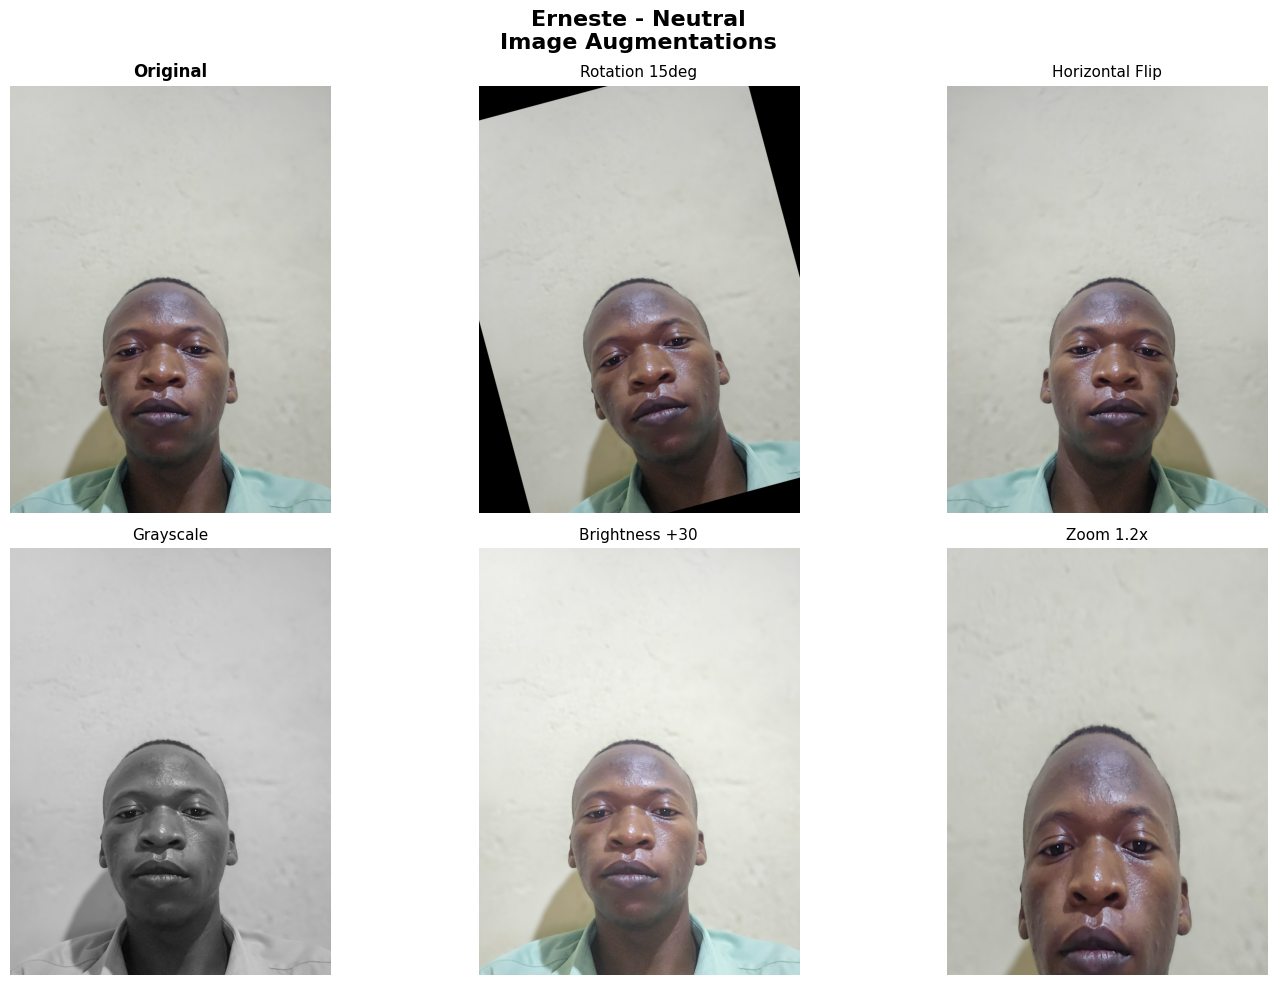

  Saved: Erneste_Neutral_augmentations.png
Creating augmentation visualization for: Erneste_Smile.jpg


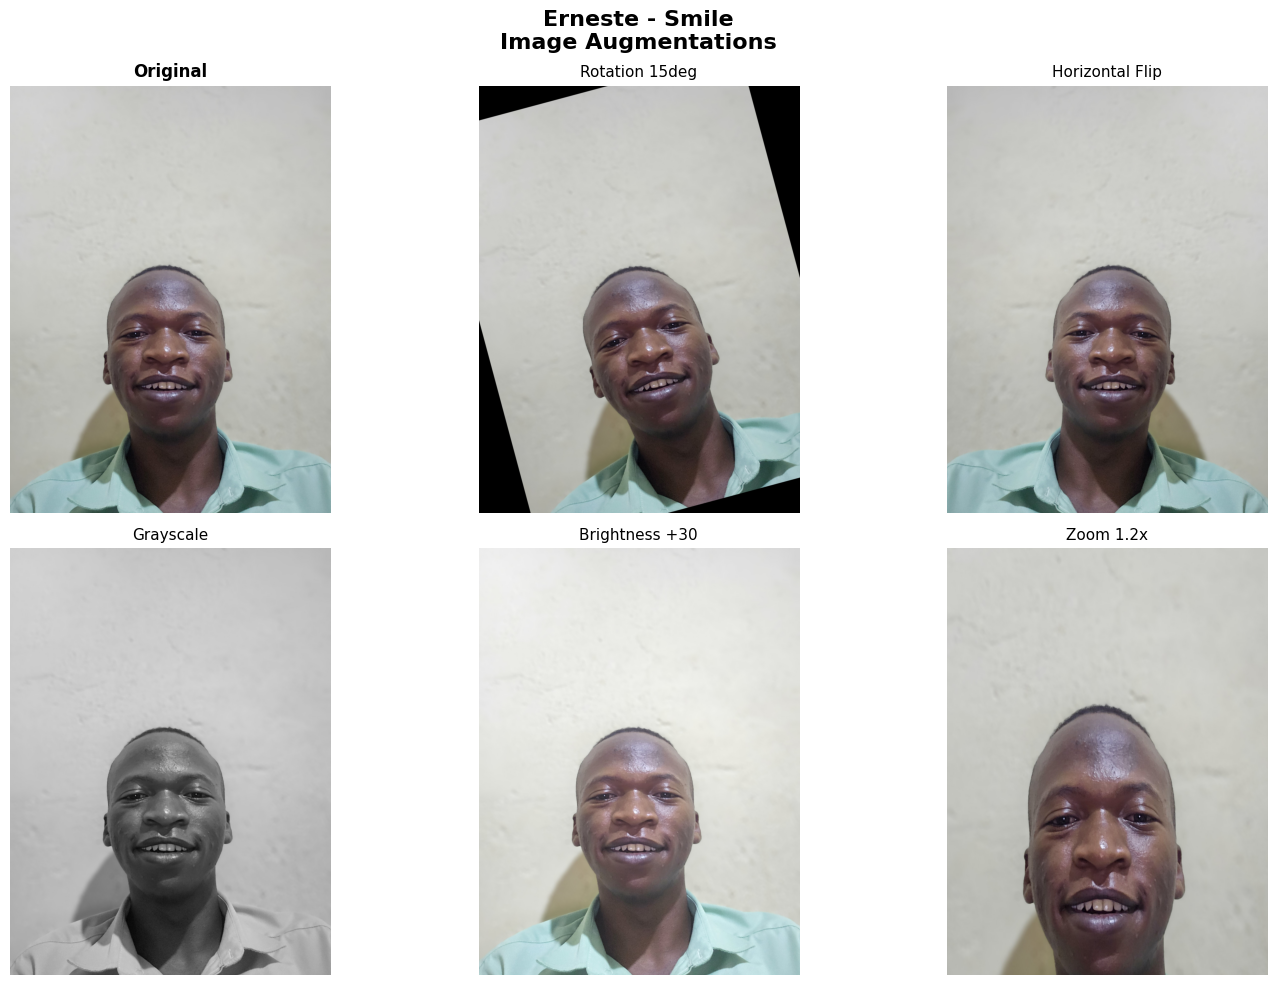

  Saved: Erneste_Smile_augmentations.png
Creating augmentation visualization for: Erneste_Suprised.jpg


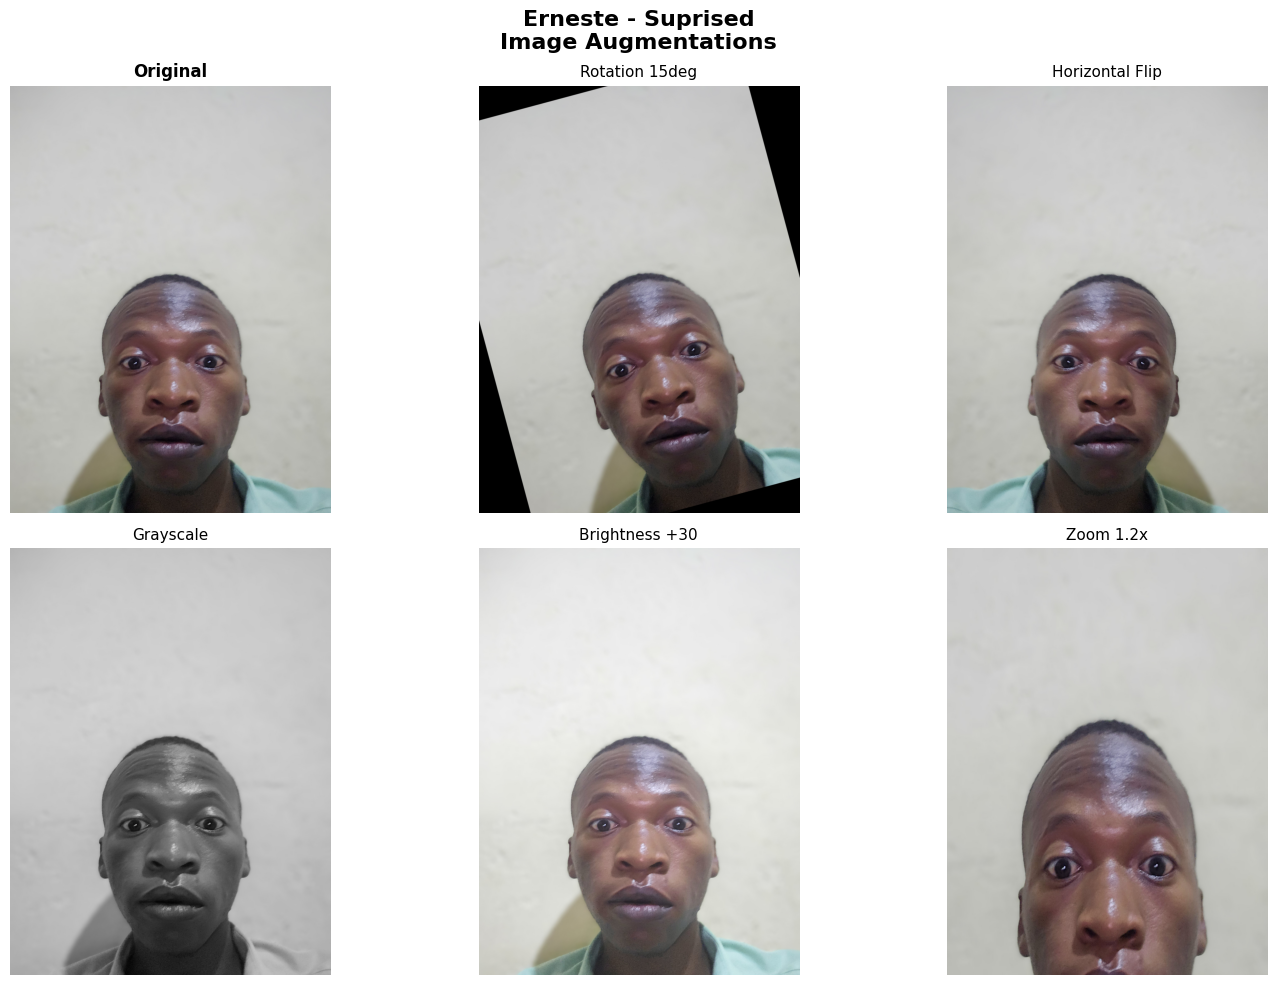

  Saved: Erneste_Suprised_augmentations.png
Creating augmentation visualization for: Thierry_Neutral.jpg


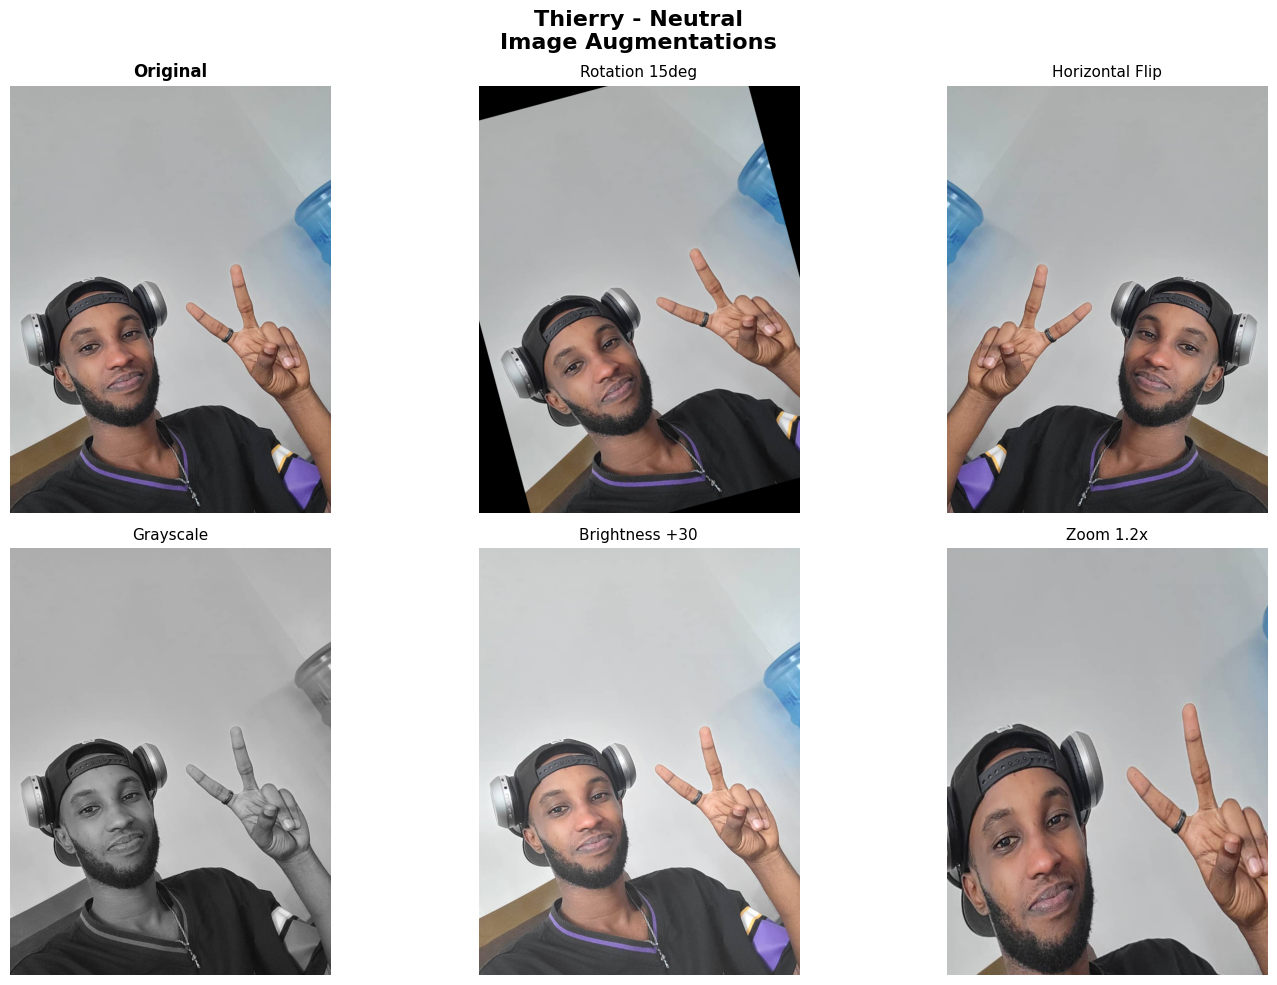

  Saved: Thierry_Neutral_augmentations.png
Creating augmentation visualization for: Thierry_Smile.jpg


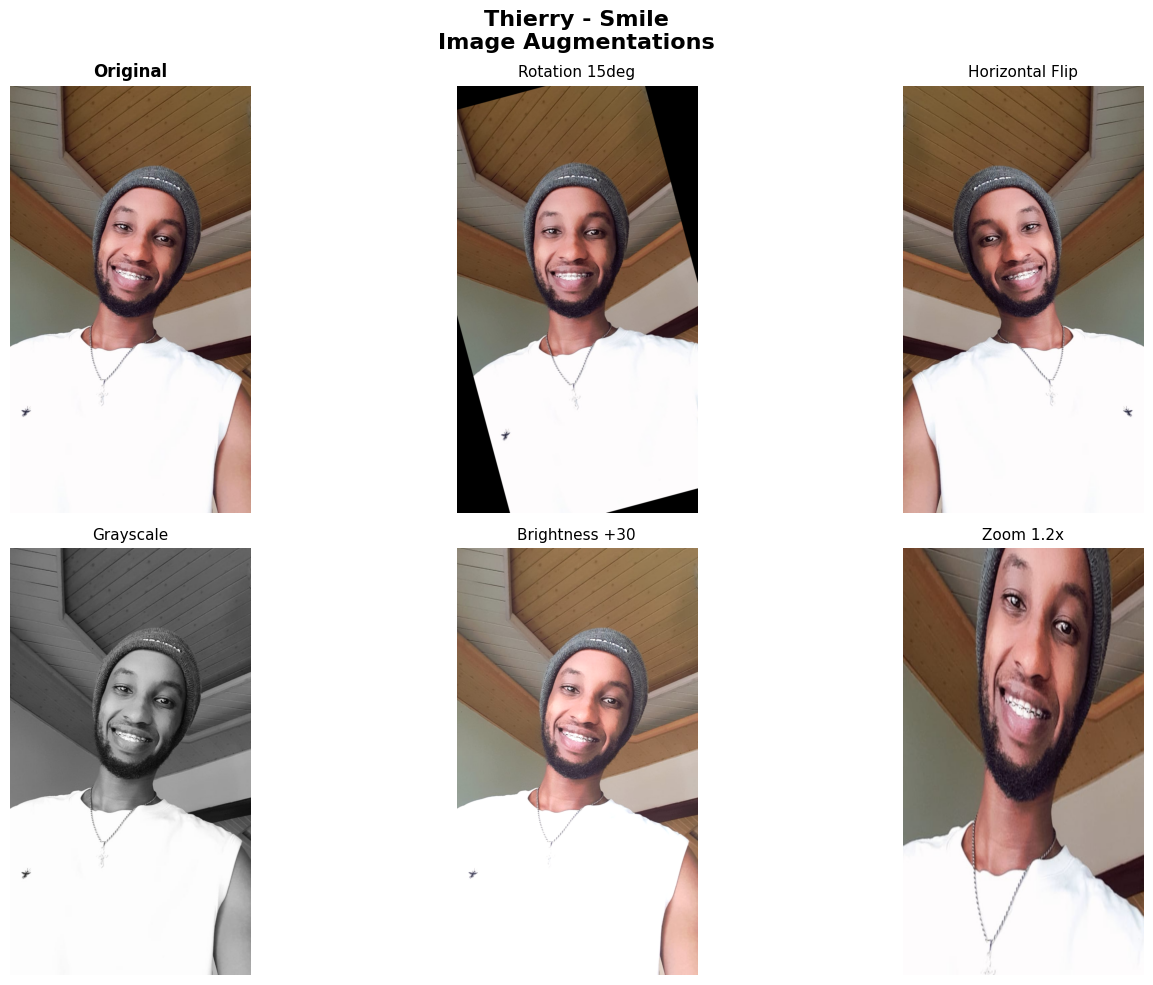

  Saved: Thierry_Smile_augmentations.png
Creating augmentation visualization for: Thierry_Suprised.jpg


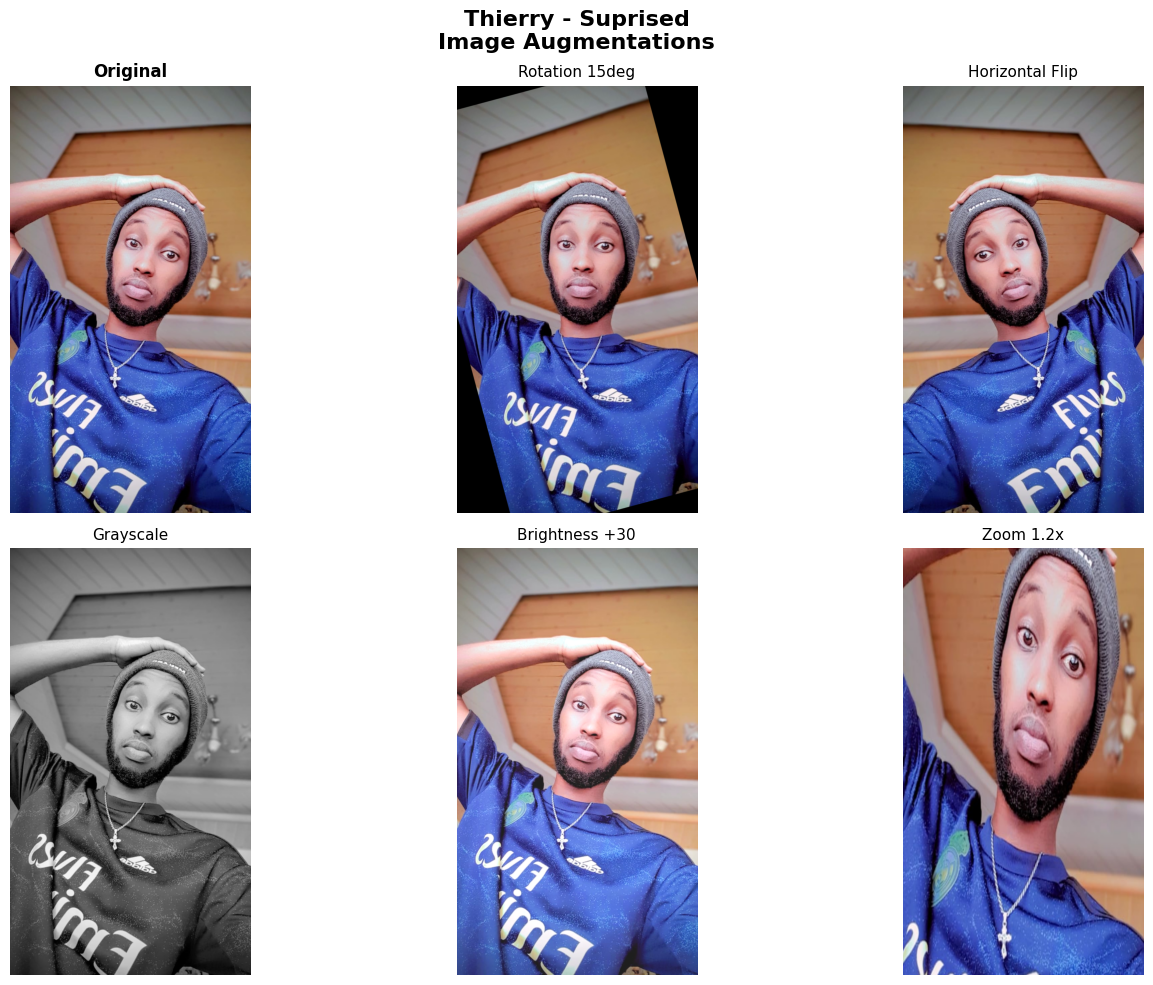

  Saved: Thierry_Suprised_augmentations.png

Creating combined visualization for all members...


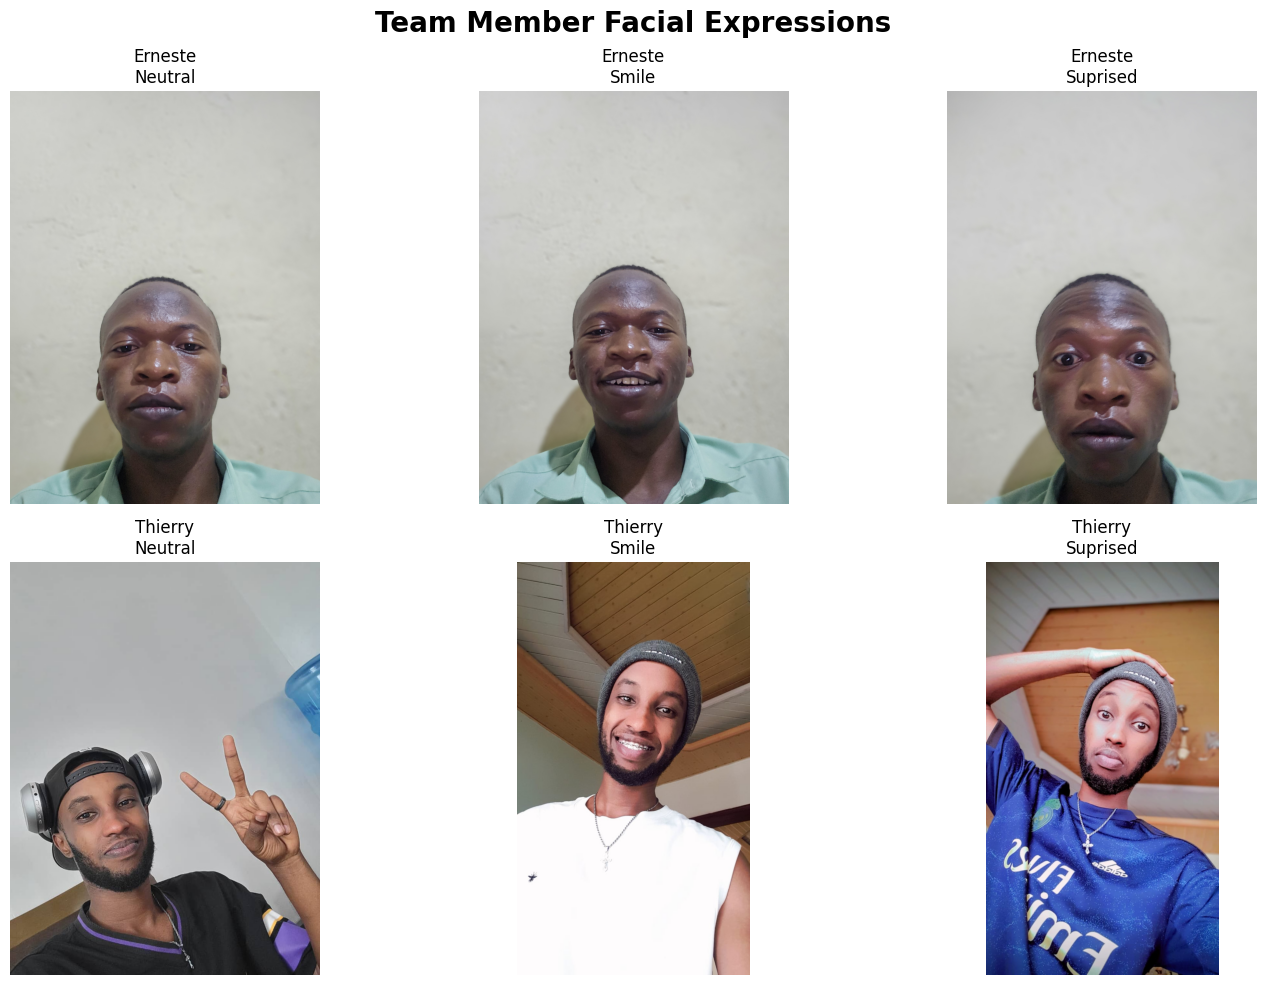

  Saved combined visualization: all_members_combined.png


In [9]:
def create_augmentation_visualizations_for_all():
    """Create augmentation visualizations for all images and each member"""
    if not existing_images:
        print("No images available for augmentation visualization")
        return
    
    print("Creating augmentation visualizations for all members...\n")
    
    # Create visualizations for each image
    for member, expression, filename in existing_images:
        print(f"Creating augmentation visualization for: {filename}")
        
        filepath = IMAGES_DIR / filename
        original_img = cv2.imread(str(filepath))
        
        if original_img is not None:
            base_name = filename.rsplit('.', 1)[0]
            augmented_list = apply_augmentations(original_img, base_name)
            
            # Display original and all augmentations
            fig, axes = plt.subplots(2, 3, figsize=(15, 10))
            fig.suptitle(f'{member} - {expression}\nImage Augmentations', fontsize=16, fontweight='bold')
            
            # Original image
            img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
            axes[0, 0].imshow(img_rgb)
            axes[0, 0].set_title('Original', fontsize=12, fontweight='bold')
            axes[0, 0].axis('off')
            
            # Augmented images
            positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
            for idx, ((aug_img, aug_name, _), (row, col)) in enumerate(zip(augmented_list, positions)):
                aug_rgb = cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB)
                axes[row, col].imshow(aug_rgb)
                axes[row, col].set_title(aug_name.replace('_', ' '), fontsize=11)
                axes[row, col].axis('off')
            
            plt.tight_layout()
            
            # Save in Visualizations folder
            save_path = VISUALIZATIONS_DIR / f"{member}_{expression}_augmentations.png"
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
            plt.show()
            
            print(f"  Saved: {save_path.name}")
        else:
            print(f"  Could not load {filename}")
    
    # Create a combined visualization showing all members
    print("\nCreating combined visualization for all members...")
    create_combined_member_visualization()

def create_combined_member_visualization():
    """Create a combined visualization showing all team members' images"""
    if len(existing_images) < 2:
        print("  Not enough images for combined visualization")
        return
    
    try:
        # Group images by member
        member_images = {}
        for member, expression, filename in existing_images:
            if member not in member_images:
                member_images[member] = []
            member_images[member].append((expression, filename))
        
        # Create a grid of visualizations
        num_members = len(member_images)
        max_images_per_member = max(len(images) for images in member_images.values())
        
        fig, axes = plt.subplots(num_members, max_images_per_member, figsize=(5*max_images_per_member, 5*num_members))
        fig.suptitle('Team Member Facial Expressions', fontsize=20, fontweight='bold')
        
        # Handle single row case
        if num_members == 1:
            axes = axes.reshape(1, -1)
        
        for row_idx, (member, images) in enumerate(member_images.items()):
            for col_idx, (expression, filename) in enumerate(images):
                filepath = IMAGES_DIR / filename
                img = cv2.imread(str(filepath))
                
                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    axes[row_idx, col_idx].imshow(img_rgb)
                    axes[row_idx, col_idx].set_title(f'{member}\n{expression}', fontsize=12)
                    axes[row_idx, col_idx].axis('off')
                else:
                    axes[row_idx, col_idx].set_title(f'{member}\nError loading', color='red')
                    axes[row_idx, col_idx].axis('off')
            
            # Hide empty subplots
            for col_idx in range(len(images), max_images_per_member):
                axes[row_idx, col_idx].set_visible(False)
        
        plt.tight_layout()
        
        # Save combined visualization
        save_path = VISUALIZATIONS_DIR / "all_members_combined.png"
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"  Saved combined visualization: {save_path.name}")
        
    except Exception as e:
        print(f"  Error creating combined visualization: {str(e)}")

# Run the augmentation visualizations
create_augmentation_visualizations_for_all()

## 10. Display Summary Statistics

In [10]:
if existing_images and 'df_features' in locals():
    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)
    
    print("\nFeatures by Team Member:")
    print(df_features.groupby('member').size())
    
    print("\nFeatures by Expression:")
    print(df_features.groupby('expression').size())
    
    print("\nFeatures by Augmentation Type:")
    print(df_features.groupby('augmentation').size())
    
    print("\n" + "="*60)
else:
    print("No features to display - processing was not completed")


SUMMARY STATISTICS

Features by Team Member:
member
Erneste    18
Thierry    18
dtype: int64

Features by Expression:
expression
Neutral     12
Smile       12
Suprised    12
dtype: int64

Features by Augmentation Type:
augmentation
Brightness_+30     6
Grayscale          6
Horizontal_Flip    6
Original           6
Rotation_15deg     6
Zoom_1.2x          6
dtype: int64



## 11. Preview the Feature DataFrame

In [11]:
if existing_images and 'df_features' in locals():
    print("\nFirst 10 rows of the feature dataset:\n")
    display(df_features.head(10))
    
    print("\nDataFrame Information:")
    print(df_features.info())
    
    print("\nBasic Statistics of Numerical Features:")
    display(df_features.describe())
else:
    print("No features available to preview")


First 10 rows of the feature dataset:



member expression     augmentation            timestamp  height  width  \
0  Erneste    Neutral         Original  2025-11-12 14:11:38    3392   2544   
1  Erneste    Neutral   Rotation_15deg  2025-11-12 14:11:38    3392   2544   
2  Erneste    Neutral  Horizontal_Flip  2025-11-12 14:11:39    3392   2544   
3  Erneste    Neutral        Grayscale  2025-11-12 14:11:39    3392   2544   
4  Erneste    Neutral   Brightness_+30  2025-11-12 14:11:39    3392   2544   
5  Erneste    Neutral        Zoom_1.2x  2025-11-12 14:11:40    3392   2544   
6  Erneste      Smile         Original  2025-11-12 14:11:40    3392   2544   
7  Erneste      Smile   Rotation_15deg  2025-11-12 14:11:41    3392   2544   
8  Erneste      Smile  Horizontal_Flip  2025-11-12 14:11:41    3392   2544   
9  Erneste      Smile        Grayscale  2025-11-12 14:11:41    3392   2544   

   channels  hist_R_0  hist_R_1  hist_R_2  ...  hist_gray_4  hist_gray_5  \
0         3  0.007433  0.041294  0.053771  ...     0.039744     0.209152   
1         3  0.113545  0.041573  0.052442  ...     0.038196     0.151264   
2         3  0.007433  0.041294  0.053771  ...     0.039744     0.209152   
3         3  0.010438  0.055224  0.055401  ...     0.039744     0.209152   
4         3  0.000100  0.008599  0.043795  ...     0.061621     0.035216   
5         3  0.003206  0.012817  0.054025  ...     0.053413     0.127821   
6         3  0.007773  0.044758  0.058363  ...     0.031355     0.244367   
7         3  0.114130  0.044255  0.057576  ...     0.027567     0.190663   
8         3  0.007773  0.044758  0.058363  ...     0.031355     0.244367   
9         3  0.011622  0.056671  0.058993  ...     0.031355     0.244367   

   hist_gray_6  hist_gray_7  mean_intensity  std_intensity  min_intensity  \
0     0.570814     0.000025      172.553377      48.366806              0   
1     0.526574     0.000023      152.626386      71.055705              0   
2     0.570814     0.000025      172.553377      48.366806              0   
3     0.570814     0.000025      172.553377      48.366806              0   
4     0.236210     0.542734      202.553116      48.366494             30   
5     0.617288     0.000049      174.001257      46.625876              1   
6     0.540313     0.000028      171.699606      48.955660              0   
7     0.493058     0.000028      151.781380      71.198748              0   
8     0.540313     0.000028      171.699606      48.955660              0   
9     0.540313     0.000028      171.699606      48.955660              0   

   max_intensity  median_intensity  edge_density  
0            255             195.0      0.001253  
1            253             194.0      0.001589  
2            255             195.0      0.001247  
3            255             195.0      0.001253  
4            255             225.0      0.001251  
5            254             199.0      0.000600  
6            255             194.0      0.001491  
7            254             191.0      0.001891  
8            255             194.0      0.001487  
9            255             194.0      0.001491  

[10 rows x 45 columns]


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   member            36 non-null     object 
 1   expression        36 non-null     object 
 2   augmentation      36 non-null     object 
 3   timestamp         36 non-null     object 
 4   height            36 non-null     int64  
 5   width             36 non-null     int64  
 6   channels          36 non-null     int64  
 7   hist_R_0          36 non-null     float32
 8   hist_R_1          36 non-null     float32
 9   hist_R_2          36 non-null     float32
 10  hist_R_3          36 non-null     float32
 11  hist_R_4          36 non-null     float32
 12  hist_R_5          36 non-null     float32
 13  hist_R_6          36 non-null     float32
 14  hist_R_7          36 non-null     float32
 15  hist_G_0          36 non-null     float32
 16  hist_G_1          36 n

height        width  channels   hist_R_0   hist_R_1   hist_R_2  \
count    36.000000    36.000000      36.0  36.000000  36.000000  36.000000   
mean   2302.666667  1647.000000       3.0   0.040801   0.069418   0.078596   
std    1106.852629   910.232686       0.0   0.052233   0.057358   0.051353   
min    1080.000000   720.000000       3.0   0.000000   0.008012   0.034187   
25%    1280.000000   720.000000       3.0   0.006922   0.034110   0.051785   
50%    2336.000000  1677.000000       3.0   0.011030   0.048631   0.058363   
75%    3392.000000  2544.000000       3.0   0.063953   0.112908   0.084618   
max    3392.000000  2544.000000       3.0   0.198265   0.214755   0.255038   

        hist_R_3   hist_R_4   hist_R_5   hist_R_6  ...  hist_gray_4  \
count  36.000000  36.000000  36.000000  36.000000  ...    36.000000   
mean    0.106234   0.083480   0.202542   0.306459  ...     0.087124   
std     0.092928   0.064863   0.154403   0.234721  ...     0.083114   
min     0.044454   0.025805   0.030602   0.009720  ...     0.023854   
25%     0.055480   0.054925   0.083764   0.077250  ...     0.036486   
50%     0.069395   0.066908   0.180696   0.219679  ...     0.052264   
75%     0.095946   0.084058   0.221517   0.562684  ...     0.079919   
max     0.373225   0.371225   0.584371   0.617826  ...     0.291941   

       hist_gray_5  hist_gray_6  hist_gray_7  mean_intensity  std_intensity  \
count    36.000000    36.000000    36.000000       36.000000      36.000000   
mean      0.179977     0.295262     0.104594      155.553335      57.405253   
std       0.152093     0.246805     0.178819       25.856769      11.772955   
min       0.022378     0.008937     0.000000       98.185776      46.625876   
25%       0.062247     0.046075     0.000028      142.629826      48.667410   
50%       0.142435     0.222380     0.001169      154.554718      51.730852   
75%       0.217956     0.554936     0.115402      171.913049      66.654384   
max       0.528699     0.617288     0.551054      202.553116      90.472141   

       min_intensity  max_intensity  median_intensity  edge_density  
count      36.000000      36.000000         36.000000     36.000000  
mean        5.361111     249.222222        170.472222      0.016073  
std        11.351911      12.624491         38.560147      0.018355  
min         0.000000     218.000000        104.000000      0.000306  
25%         0.000000     253.750000        121.000000      0.001250  
50%         0.000000     255.000000        192.500000      0.006542  
75%         2.000000     255.000000        196.250000      0.025871  
max        32.000000     255.000000        227.000000      0.055383  

[8 rows x 41 columns]

## 12. Final Summary & Next Steps

In [12]:
print("\n" + "="*60)
print("NOTEBOOK EXECUTION COMPLETED!")
print("="*60)

if existing_images and 'df_features' in locals():
    print("\nGenerated Files:")
    print(f"  {OUTPUT_CSV.name} - Feature dataset ({len(df_features)} rows × {len(df_features.columns)} columns)")
    print(f"  {AUGMENTED_DIR.name}/ - {len(all_features) - len(existing_images)} augmented images")
    print(f"  {VISUALIZATIONS_DIR.name}/ - All image visualizations")
    
    # List visualization files
    if VISUALIZATIONS_DIR.exists():
        vis_files = list(VISUALIZATIONS_DIR.glob("*.png"))
        print(f"\nVisualization Files ({len(vis_files)} total):")
        for vis_file in vis_files:
            print(f"    • {vis_file.name}")
    
    print("\nData Summary:")
    print(f"  • Original images: {len(existing_images)}")
    print(f"  • Augmented images: {len(all_features) - len(existing_images)}")
    print(f"  • Total feature rows: {len(all_features)}")
    print(f"  • Features per image: {len(df_features.columns)} columns")
else:
    print("\n Processing incomplete - no images were found in the Images folder")
    print("   Please ensure the Images folder exists at the project root with your images")
print("="*60 + "\n")


NOTEBOOK EXECUTION COMPLETED!

Generated Files:
  image_features.csv - Feature dataset (36 rows × 45 columns)
  Augmented_Images/ - 30 augmented images
  Visualizations/ - All image visualizations

Visualization Files (9 total):
    • all_members_combined.png
    • Erneste_Neutral_augmentations.png
    • Erneste_original_images.png
    • Erneste_Smile_augmentations.png
    • Erneste_Suprised_augmentations.png
    • Thierry_Neutral_augmentations.png
    • Thierry_original_images.png
    • Thierry_Smile_augmentations.png
    • Thierry_Suprised_augmentations.png

Data Summary:
  • Original images: 6
  • Augmented images: 30
  • Total feature rows: 36
  • Features per image: 45 columns

